# Correlations and Clustering

## Correlations

First, lets's import the libraries we will use, load our data and see the first five entries.

In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt

%matplotlib inline
data = pd.read_csv("deneme.csv")
data = data.drop(["Round","Player1","TPW.1","Player2", "FSP.2", "FSW.2", "SSP.2", "SSW.2", "ACE.2","DBF.2", "WNR.2", "UFE.2","BPC.2","BPW.2","TPW.2" , "FNL1", "FNL2","NPA.1","NPW.1","ST1.1","ST2.1","ST3.1","ST4.1","ST5.1","NPA.2","NPW.2","ST1.2","ST2.2","ST3.2","ST4.2","ST5.2"], axis=1)
data.rename(columns={"FSP.1":"FSP" , "FSW.1" : "FSW" , "SSP.1" : "SSP" , "SSW.1" : "SSW","ACE.1" : "ACE", "DBF.1" : "DBF", "WNR.1":"WNR", "UFE.1" : "UFE", "BPC.1" : "BPC" , "BPW.1" : "BPW"}, inplace=True)
data.head()

,Result,FSP,FSW,SSP,SSW,ACE,DBF,WNR,UFE,BPC,BPW
0,0,61,35,39,18,5,1.0,17,29,1,3
1,1,61,31,39,13,13,1.0,13,1,7,14
2,0,52,53,48,20,8,4.0,37,50,1,9
3,1,53,39,47,24,8,6.0,8,6,6,9
4,0,76,63,24,12,0,4.0,16,35,3,12


We will calculate Pearson's correlation coefficients matrix

In [73]:
corrData =data.corr()
corrData

,Result,FSP,FSW,SSP,SSW,ACE,DBF,WNR,UFE,BPC,BPW
Result,1.000000,0.116585,0.131092,-0.116585,0.121723,0.190405,-0.099503,0.193906,-0.164472,0.626180,0.494495
FSP,0.116585,1.000000,0.230139,-1.000000,-0.487529,-0.092801,-0.362946,-0.000631,-0.107677,0.037264,0.065814
FSW,0.131092,0.230139,1.000000,-0.230139,0.581404,0.537616,0.292316,0.598778,0.397354,0.230163,0.351445
SSP,-0.116585,-1.000000,-0.230139,1.000000,0.487529,0.092801,0.362946,0.000631,0.107677,-0.037264,-0.065814
SSW,0.121723,-0.487529,0.581404,0.487529,1.000000,0.432403,0.371954,0.441742,0.295111,0.236923,0.278757
ACE,0.190405,-0.092801,0.537616,0.092801,0.432403,1.000000,0.209837,0.613009,0.217433,0.049749,0.140383
DBF,-0.099503,-0.362946,0.292316,0.362946,0.371954,0.209837,1.000000,0.186202,0.351850,0.029884,0.021315
WNR,0.193906,-0.000631,0.598778,0.000631,0.441742,0.613009,0.186202,1.000000,0.700202,0.096655,0.199054
UFE,-0.164472,-0.107677,0.397354,0.107677,0.295111,0.217433,0.351850,0.700202,1.000000,-0.024630,0.050152
BPC,0.626180,0.037264,0.230163,-0.037264,0.236923,0.049749,0.029884,0.096655,-0.024630,1.000000,0.799070


To see more clearly, we should visualize it.

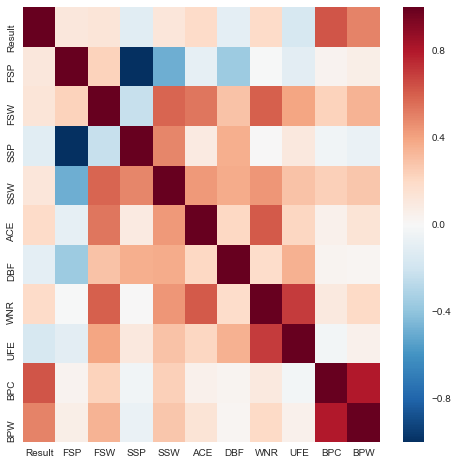

In [74]:
import seaborn as sns
fig = plt.figure(figsize=(8,8))
sns.heatmap(corrData); 

There is a strong positive correlation between:
* Break Points Created and Break Points Won
* Winners and Unforced Errors

A little bit less but still significant correlation between:
* Result and Break Points Created
* Winners and Aces
* winners and First Serve Points Won

There is strong negative correlation between:
* Second Serve Percentage and First Serve Percentage

A little bit less but still significant correlation between:
* Second Serve Won and First Serve Percentage
* Double Faults and First Serve Percentage

Let's do the same thing without including the result.

In [75]:
statistics = data.drop(["Result"], axis=1)
corrStatistics = statistics.corr()
corrStatistics

,FSP,FSW,SSP,SSW,ACE,DBF,WNR,UFE,BPC,BPW
FSP,1.000000,0.230139,-1.000000,-0.487529,-0.092801,-0.362946,-0.000631,-0.107677,0.037264,0.065814
FSW,0.230139,1.000000,-0.230139,0.581404,0.537616,0.292316,0.598778,0.397354,0.230163,0.351445
SSP,-1.000000,-0.230139,1.000000,0.487529,0.092801,0.362946,0.000631,0.107677,-0.037264,-0.065814
SSW,-0.487529,0.581404,0.487529,1.000000,0.432403,0.371954,0.441742,0.295111,0.236923,0.278757
ACE,-0.092801,0.537616,0.092801,0.432403,1.000000,0.209837,0.613009,0.217433,0.049749,0.140383
DBF,-0.362946,0.292316,0.362946,0.371954,0.209837,1.000000,0.186202,0.351850,0.029884,0.021315
WNR,-0.000631,0.598778,0.000631,0.441742,0.613009,0.186202,1.000000,0.700202,0.096655,0.199054
UFE,-0.107677,0.397354,0.107677,0.295111,0.217433,0.351850,0.700202,1.000000,-0.024630,0.050152
BPC,0.037264,0.230163,-0.037264,0.236923,0.049749,0.029884,0.096655,-0.024630,1.000000,0.799070
BPW,0.065814,0.351445,-0.065814,0.278757,0.140383,0.021315,0.199054,0.050152,0.799070,1.000000


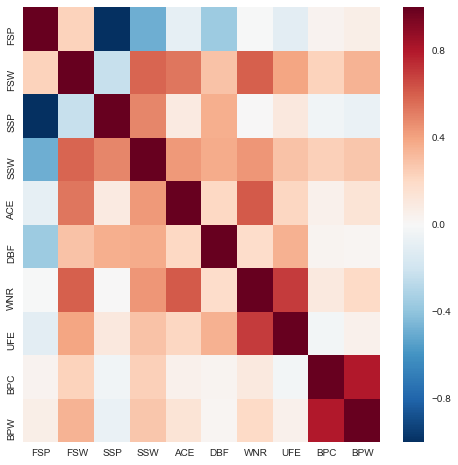

In [76]:
import seaborn as sns
fig = plt.figure(figsize=(8,8))
sns.heatmap(corrStatistics); 

The result is slightly the same, but there seems to come out some strong correlations between Aces and First Serve Points Won

# BU NASIL YORUMLANCAK


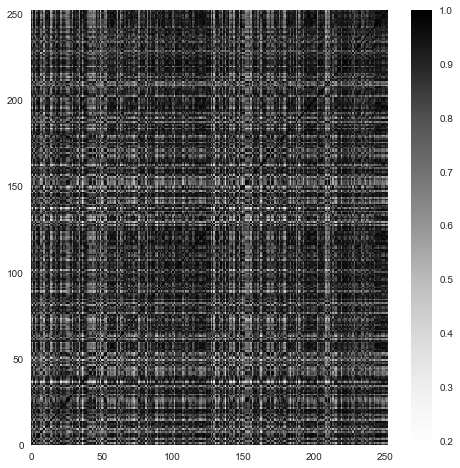

In [60]:
statistics_T = data.T.corr() 
plt.figure(figsize=(8,8)) 
plt.pcolor(statistics_T)  
plt.axis("tight")
plt.colorbar();

## Clustering

In [61]:
data.Result.unique()

array([0, 1], dtype=int64)

We have 2 different results, so we should have 2 clusters.

Let's create the model with two clusters and fit our data

In [77]:
import sklearn
model = sklearn.cluster.SpectralClustering(n_clusters=2,affinity='precomputed')

In [79]:
statistics.dropna()
model.fit(statistics)

ValueError: Input contains NaN, infinity or a value too large for dtype('float64').

See also which row belongs to which cluster

In [44]:
model.row_labels_

array([1, 1, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 1, 1,
       1, 1, 1, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 1, 1, 1, 1, 1, 1,
       0, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 1, 0, 0,
       0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 0, 1, 0, 1, 0, 0, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0, 1,
       0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 0, 1, 0, 0, 0, 1, 0, 0, 0, 1, 1, 1, 1, 1, 0, 0, 1, 0, 1,
       0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0, 0, 1, 0, 1, 1, 1, 0, 0, 0, 0,
       0, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 1, 1, 1, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 1, 0, 0, 0, 1,
       1, 0, 0, 1, 0, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0])

Specifies whether the row is in the cluster or not

In [45]:
model.rows_

array([[False, False,  True, False, False,  True,  True, False,  True,
        False,  True,  True,  True,  True, False, False,  True, False,
         True,  True,  True, False, False, False, False, False, False,
        False,  True, False,  True, False,  True,  True, False,  True,
         True,  True,  True,  True, False, False, False, False, False,
        False,  True, False,  True, False,  True,  True, False, False,
         True,  True,  True,  True,  True,  True, False, False,  True,
        False,  True,  True, False,  True,  True,  True,  True,  True,
         True,  True,  True,  True, False, False,  True, False, False,
         True, False,  True, False,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True, False, False,  True,  True,
         True, False,  True,  True,  True,  True,  True,  True,  True,
         True, False, False,  True,  True,  True, False,  True,  True,
         True,  True,  True,  True,  True,  True,  True, False, False,
      

Let's append our cluster labels to the data, reorder our data based on these clusters and change the indices accordingly.

In [46]:
data["Group"] = pd.Series(model.row_labels_, index=data.index)
data = data.ix[np.argsort(model.row_labels_)]
data = data.reset_index(drop=True)
data.head(10)

,Result,FSP,FSW,SSP,SSW,ACE,DBF,WNR,UFE,BPC,BPW,Group
0,1,55,46,45,22,19,2.0,53,49,5,15,0
1,1,56,54,44,24,14,3.0,57,37,2,5,0
2,0,61,52,39,27,4,3.0,33,49,3,11,0
3,0,63,33,37,10,8,9.0,29,32,0,0,0
4,0,52,32,48,23,8,1.0,29,28,0,1,0
5,1,62,59,38,25,8,3.0,48,47,7,14,0
6,1,60,57,40,21,11,3.0,38,34,4,5,0
7,1,71,67,29,14,12,1.0,36,28,5,8,0
8,1,58,71,42,36,17,5.0,51,60,5,10,0
9,1,52,52,48,27,10,4.0,43,62,5,13,0


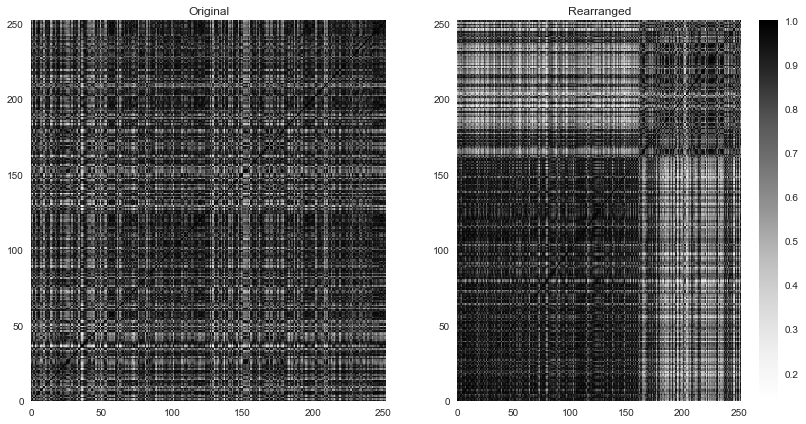

In [14]:
correlations = data.iloc[:, 2:14].T.corr()
correlations = np.array(correlations)
plt.figure(figsize=(14,7))
plt.subplot(121)
plt.pcolor(statistics_T)
plt.title("Original")
plt.axis("tight")
plt.subplot(122)
plt.pcolor(correlations)
plt.title("Rearranged")
plt.axis("tight")
plt.colorbar();

In [54]:
x = model.fit_predict()

AttributeError: 'SpectralCoclustering' object has no attribute 'fit_predict'